In [25]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [29]:
from utils_functions import UtilsFunctions

In [30]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
X.shape

(569, 30)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [48]:
pipeline1 = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=4, random_state=42)),
    ("knn", KNeighborsClassifier())])

pipeline1.fit(X_train, y_train)

,steps,"[('scaler', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_components,4
,copy,True
,whiten,False
,svd_solver,'auto'


In [49]:
predict_p1 = pipeline1.predict(X_test)
predict_p1_prob = pipeline1.predict_proba(X_test)

In [50]:
UtilsFunctions.get_metrics(y_test, predict_p1)

{'accuracy': 0.9385964912280702,
 'recall_score': 0.9385964912280702,
 'precision_score': 0.938457254246728,
 'f1_score': 0.9384499917007656,
 'mcc': 0.868859654660177}

In [52]:
predict_p1_prob_1 = [x[1] for x in predict_p1_prob]

In [53]:
UtilsFunctions.get_roc_auc(y_test, predict_p1_prob_1)

0.9762528660334098

In [44]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, PrecisionRecallDisplay

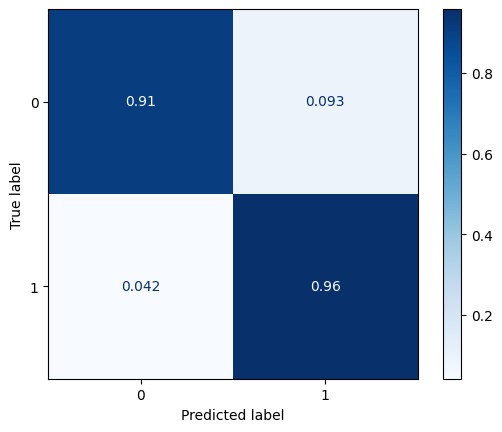

In [54]:
ConfusionMatrixDisplay.from_estimator(
    pipeline1,
    X_test,
    y_test,
    normalize="true",
    cmap="Blues"
)

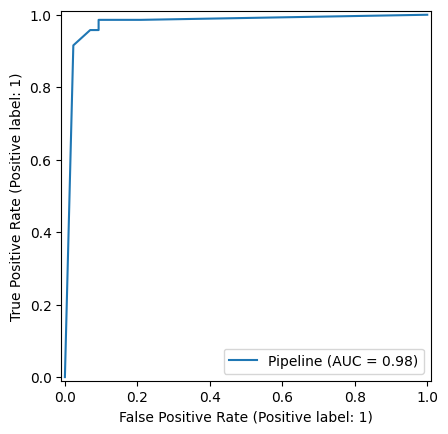

In [55]:
RocCurveDisplay.from_estimator(
    pipeline1,
    X_test,
    y_test,
)

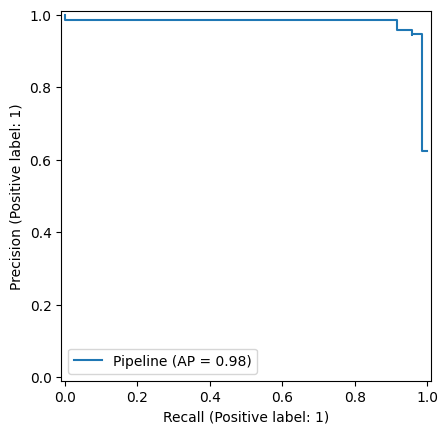

In [56]:
PrecisionRecallDisplay.from_estimator(
    pipeline1,
    X_test,
    y_test,
)

In [57]:
from joblib import dump

In [58]:
dump(pipeline1, "demo_model.joblib")

['demo_model.joblib']